<a href="https://colab.research.google.com/github/AlirezaSamari/DeepLearning-Pytorch-fastai-/blob/main/whats_your_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
!pip install fastbook
from fastbook import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
from fastai.callback.core import URLs
#from fastai.data.external import untar_data
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
path_img = (path/'images')
path_anno = (path/'annotations')

In [ ]:
help(get_image_files)

Help on function get_image_files in module fastai.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.



In [ ]:
fnames = get_image_files(path_img)
fnames

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_91.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_200.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_140.jpg')...]

In [ ]:
import numpy as np
np.random.seed(2)

In [ ]:
help( ImageDataLoaders.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path, fnames, pat, *, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) method of builtins.type instance
    Create from the name attrs of `fnames` in `path`s with re expression `pat`



In [ ]:
doc(RandomResizedCrop)

RandomResizedCrop(self, size: 'int | tuple', min_scale: 'float' = 0.08, ratio=(0.75, 1.3333333333333333), resamples=(2, 0), val_xtra: 'float' = 0.14, max_scale: 'float' = 1.0, **kwargs)
Picks a random scaled crop of an image and resize it to `size`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
help(aug_transforms)

Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



In [ ]:
bs = 64
pat =  r'(.+)_\d+.jpg$'
item_tfms = RandomResizedCrop(size=460, min_scale = 0.75, ratio = (1., 1.))
batch_tfms = batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
from fastcore import transform
#Image Data Loader
data = ImageDataLoaders.from_name_re(path, fnames=fnames, pat = pat, item_tfms = item_tfms, batch_tfms=batch_tfms, size = 224, bs = bs)

In [ ]:
doc(DataBlock)

DataBlock(blocks: 'list' = None, dl_type: 'TfmdDL' = None, getters: 'list' = None, n_inp: 'int' = None, item_tfms: 'list' = None, batch_tfms: 'list' = None, *, get_items=None, splitter=None, get_y=None, get_x=None)
Generic container to quickly build `Datasets` and `DataLoaders`.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


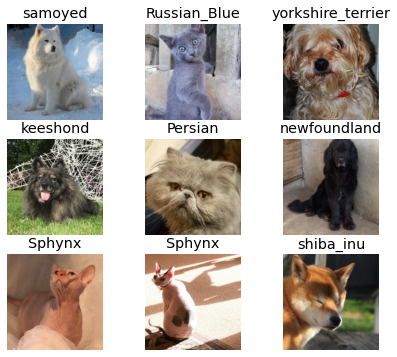

In [ ]:
data.show_batch(figsize=(7,6))

In [ ]:
data.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
data.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate, pretrained = True, path='/content/gdrive/My Drive/fastai/')

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.callback.schedule:

fit_one_cycle(n_epoch, lr_max=None, div=25.0, div_final=100000.0, pct_start=0.25, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0) method of fastai.learner.Learner instance
    Fit `self.model` for `n_epoch` using the 1cycle policy.



In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.902719,0.359396,0.110961,01:16
1,0.671588,0.249163,0.079161,01:09
2,0.391615,0.223507,0.073072,01:06
3,0.284988,0.219113,0.068336,01:06


In [ ]:
learn.save('stage-1')

Path('/content/gdrive/My Drive/fastai/models/stage-1.pth')

In [ ]:
# learn.export('WhatsYourPet?.pkl')

#A look at results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

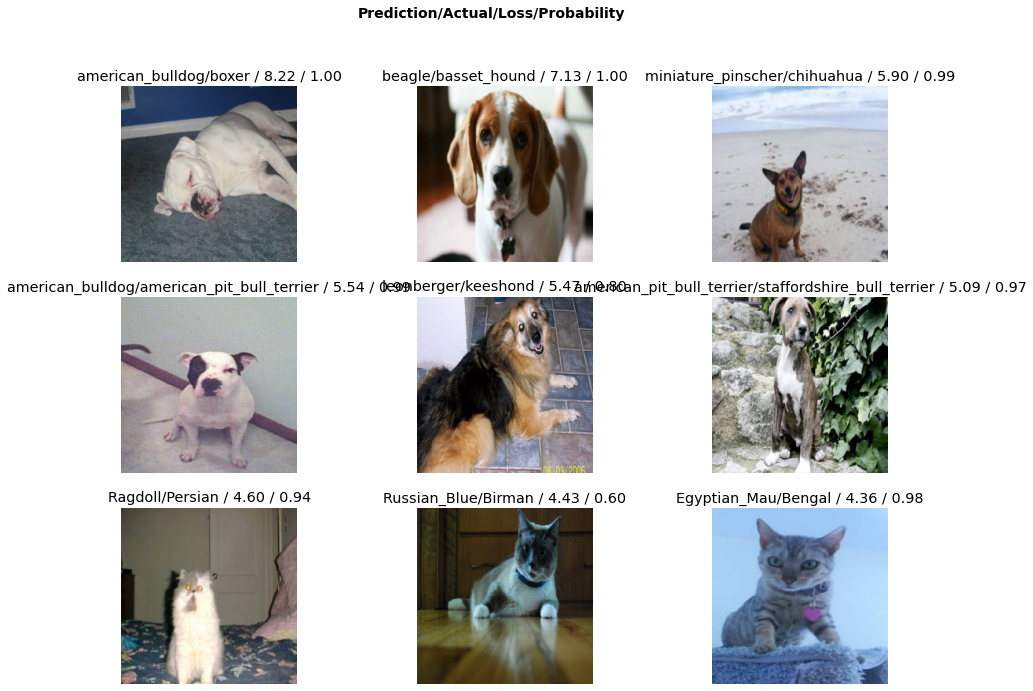

In [ ]:
interp.plot_top_losses(9, figsize = (15, 11))

In [ ]:
doc(interp.top_losses)

Interpretation.top_losses(k: 'int | None' = None, largest: 'bool' = True, items: 'bool' = False)
`k` largest(/smallest) losses and indexes, defaulting to all losses.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


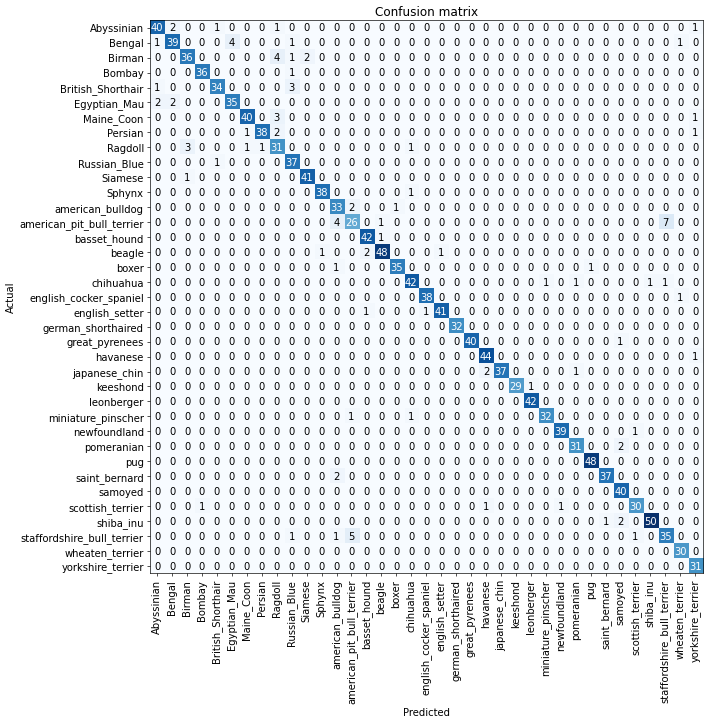

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [ ]:
interp.most_confused()

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Siamese', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'Ragdoll', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('japanese_chin', 'havanese', 2),
 ('pomeranian', 'samoyed', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('shiba_inu', 'samoyed', 2),
 ('Abyssinian', 'British_Shorthair', 1),
 ('Abyssinian', 'Ragdoll', 1),
 ('Abyssinian', 'yorkshire_terrier', 1),
 ('Bengal', 'Abyssinian', 1),
 ('Bengal', 'Russian_Blue', 1),
 ('Bengal', 'wheaten_terrier', 1),
 ('Birman', 'Russian_Blue', 1),
 ('Bombay', 'Russian_Blue', 1),
 (

#Unfreezing, fine-tuning, and learning rates

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.112268,3.539145,0.630582,01:10
1,1.024398,1.651584,0.421516,01:10
2,0.612239,0.545895,0.166441,01:13
3,0.316533,0.399744,0.129905,01:11


In [ ]:
learn.load('stage-1')

SuggestedLRs(valley=3.0199516913853586e-05)

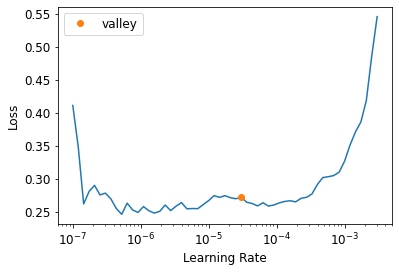

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.262160,0.215202,0.066306,01:13
1,0.242127,0.204559,0.066306,01:10
2,0.203736,0.203056,0.066306,01:10
3,0.171891,0.201063,0.064276,01:13


In [ ]:
learn.save('stage-2')

Path('/content/gdrive/My Drive/fastai/models/stage-2.pth')